In [1]:
from ACO import *
from Evaporator import *
from Initializer import *
from Intensifier import *
from Problem import VehicleRoutingProblem
from SolutionGenerator import *
from Heuristics import TSPHeuristic
from Terminator import *
import time
from EvolutionPlotter import plot_evolution

In [2]:
import seaborn as sns

## Hyperparameters: rho vs. delta values

In [3]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic
solution_gen = PermutationSolutionGenerator(number_of_ants=10, alpha=8, beta=8, heuristic=heuristic, problem=problem)

In [4]:
rho_values = np.arange(0.04, 0.2, 0.04)
delta_values = np.arange(0.04, 0.2, 0.04)
best_scores = np.zeros(shape=(rho_values.shape[0], delta_values.shape[0]))
runs_per_config = 5

for i, rho in enumerate(rho_values):
    for j, delta in enumerate(delta_values):
        evaporator = Evaporator(rho=rho)
        intensifier = Intensifier(delta=delta)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=50), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            solutions, scores = aco.run()
            best_scores[i,j] += aco.best_score
        best_scores[i,j] /= runs_per_config
        print('rho: %f, delta: %f, score: %d' % (rho, delta, best_scores[i,j]))

rho: 0.040000, delta: 0.040000, score: 68216
rho: 0.040000, delta: 0.080000, score: 68034
rho: 0.040000, delta: 0.120000, score: 68283
rho: 0.040000, delta: 0.160000, score: 69007
rho: 0.080000, delta: 0.040000, score: 69637
rho: 0.080000, delta: 0.080000, score: 69457
rho: 0.080000, delta: 0.120000, score: 69668
rho: 0.080000, delta: 0.160000, score: 69814
rho: 0.120000, delta: 0.040000, score: 69953
rho: 0.120000, delta: 0.080000, score: 69215
rho: 0.120000, delta: 0.120000, score: 70479
rho: 0.120000, delta: 0.160000, score: 70621
rho: 0.160000, delta: 0.040000, score: 69355
rho: 0.160000, delta: 0.080000, score: 70136
rho: 0.160000, delta: 0.120000, score: 70305
rho: 0.160000, delta: 0.160000, score: 71448


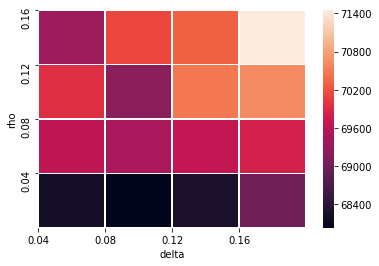

In [5]:
ax = sns.heatmap(np.flip(best_scores,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(delta_values)))
ax.set_yticks(np.arange(len(rho_values)))
ax.set_xticklabels(np.round(delta_values,2))
ax.set_yticklabels(np.flip(np.round(rho_values,2),axis=0))
ax.set_xlabel('delta')
ax.set_ylabel('rho')
plt.show()

## Hyperparameters: ants vs. rho / delta values

In [6]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [7]:
update_values = np.arange(0.04, 0.2, 0.04)
numbers_of_ants = [1, 5, 10 ,15]
best_scores_1 = np.zeros(shape=(update_values.shape[0], len(numbers_of_ants)))
runs_per_config = 5

for i, update_value in enumerate(update_values):
    for j, ants in enumerate(numbers_of_ants):
        evaporator = Evaporator(rho=update_value)
        intensifier = Intensifier(delta=update_value)
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=2, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=50), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            solutions, scores = aco.run()
            best_scores_1[i,j] += aco.best_score
        best_scores_1[i,j] /= runs_per_config
        print('ants: %d, rho / delta: %f, score: %d' % (ants, update_value, best_scores_1[i,j]))

ants: 1, rho / delta: 0.040000, score: 124482
ants: 5, rho / delta: 0.040000, score: 117983
ants: 10, rho / delta: 0.040000, score: 115493
ants: 15, rho / delta: 0.040000, score: 114639
ants: 1, rho / delta: 0.080000, score: 121371
ants: 5, rho / delta: 0.080000, score: 117486
ants: 10, rho / delta: 0.080000, score: 114506
ants: 15, rho / delta: 0.080000, score: 114415
ants: 1, rho / delta: 0.120000, score: 121069
ants: 5, rho / delta: 0.120000, score: 116928
ants: 10, rho / delta: 0.120000, score: 114238
ants: 15, rho / delta: 0.120000, score: 111488
ants: 1, rho / delta: 0.160000, score: 122176
ants: 5, rho / delta: 0.160000, score: 114710
ants: 10, rho / delta: 0.160000, score: 109428
ants: 15, rho / delta: 0.160000, score: 106505


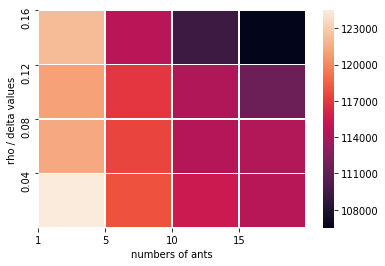

In [8]:
ax = sns.heatmap(np.flip(best_scores_1,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(update_values)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(np.round(update_values,2),axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('rho / delta values')
plt.show()

## Hyperparameters: ants vs. considered number of solutions

In [9]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [10]:
numbers_of_solutions = [1, 2, 3]
numbers_of_ants = [5, 10 ,15]
best_scores_2 = np.zeros(shape=(len(numbers_of_solutions), len(numbers_of_ants)))
runs_per_config = 5

for i, number_of_solutions in enumerate(numbers_of_solutions):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=2, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=50), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator,
                                       number_of_solutions, True, False)
            solutions, scores = aco.run()
            best_scores_2[i,j] += aco.best_score
        best_scores_2[i,j] /= runs_per_config
        print('ants: %d, considered solutions: %d, score: %d' % (ants, number_of_solutions, best_scores_2[i,j]))

ants: 5, considered solutions: 1, score: 117685
ants: 10, considered solutions: 1, score: 115206
ants: 15, considered solutions: 1, score: 116670
ants: 5, considered solutions: 2, score: 115786
ants: 10, considered solutions: 2, score: 117371
ants: 15, considered solutions: 2, score: 115467
ants: 5, considered solutions: 3, score: 115636
ants: 10, considered solutions: 3, score: 115722
ants: 15, considered solutions: 3, score: 114216


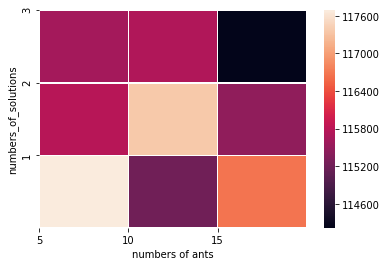

In [11]:
ax = sns.heatmap(np.flip(best_scores_2,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(numbers_of_solutions)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(np.round(numbers_of_solutions,2),axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('numbers_of_solutions')
plt.show()

## Hyperparameters: with vs. without distance heuristic

In [12]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [13]:
heuristics = [TSPHeuristic, None]
numbers_of_ants = [1, 5, 10 ,15]
best_scores_3 = np.zeros(shape=(len(heuristics), len(numbers_of_ants)))
runs_per_config = 5

for i, heuristic in enumerate(heuristics):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=2, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=50), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            solutions, scores = aco.run()
            best_scores_3[i,j] += aco.best_score
        best_scores_3[i,j] /= runs_per_config
        print('ants: %d, heuristic: %s, score: %d' % (ants, heuristic, best_scores_3[i,j]))

ants: 1, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 123619
ants: 5, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 118538
ants: 10, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 118108
ants: 15, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 116179
ants: 1, heuristic: None, score: 280722
ants: 5, heuristic: None, score: 270216
ants: 10, heuristic: None, score: 261935
ants: 15, heuristic: None, score: 263932


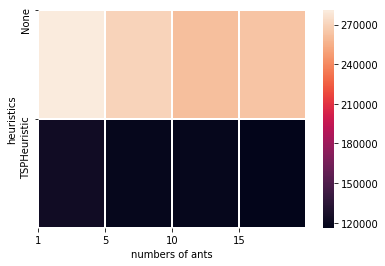

In [14]:
ax = sns.heatmap(np.flip(best_scores_3,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(heuristics)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(['TSPHeuristic', 'None'],axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('heuristics')
plt.show()

## Hyperparameters: alpha / beta weights 

In [15]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [16]:
values = np.arange(2, 14, 2)
best_scores_4 = np.zeros(shape=(len(values), len(values)))
runs_per_config = 5

for i, alpha in enumerate(values):
    for j, beta in enumerate(values):
        solution_gen = PermutationSolutionGenerator(number_of_ants=10, alpha=alpha, beta=beta,
                                                    heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=50), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            solutions, scores = aco.run()
            best_scores_4[i,j] += aco.best_score
        best_scores_4[i,j] /= runs_per_config
        print('alpha: %d, beta: %s, score: %d' % (alpha, beta, best_scores_4[i,j]))

alpha: 2, beta: 2, score: 116065
alpha: 2, beta: 4, score: 78931
alpha: 2, beta: 6, score: 69264
alpha: 2, beta: 8, score: 68571
alpha: 2, beta: 10, score: 66706
alpha: 2, beta: 12, score: 66131
alpha: 4, beta: 2, score: 110718
alpha: 4, beta: 4, score: 75955
alpha: 4, beta: 6, score: 68523
alpha: 4, beta: 8, score: 68142
alpha: 4, beta: 10, score: 66156
alpha: 4, beta: 12, score: 67526
alpha: 6, beta: 2, score: 106060
alpha: 6, beta: 4, score: 73558
alpha: 6, beta: 6, score: 68517
alpha: 6, beta: 8, score: 67773
alpha: 6, beta: 10, score: 66655
alpha: 6, beta: 12, score: 67652
alpha: 8, beta: 2, score: 113798
alpha: 8, beta: 4, score: 74097
alpha: 8, beta: 6, score: 69091
alpha: 8, beta: 8, score: 69190
alpha: 8, beta: 10, score: 66021
alpha: 8, beta: 12, score: 67905
alpha: 10, beta: 2, score: 112654
alpha: 10, beta: 4, score: 78474
alpha: 10, beta: 6, score: 72084
alpha: 10, beta: 8, score: 68908
alpha: 10, beta: 10, score: 67235
alpha: 10, beta: 12, score: 66913
alpha: 12, beta: 2,

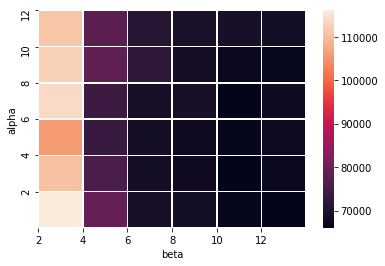

In [17]:
ax = sns.heatmap(np.flip(best_scores_4,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(values)))
ax.set_yticks(np.arange(len(values)))
ax.set_xticklabels(values)
ax.set_yticklabels(np.flip(values,axis=0))
ax.set_xlabel('beta')
ax.set_ylabel('alpha')
plt.show()

In [8]:
def print_vehicles(aco):
    zero_vehicles = list()
    selected_vehicles = list()
    best_solution = np.array(aco.best_solution[:,1:])
    for vehicle in range(aco.problem.vehicles):
        if np.sum((best_solution[vehicle] - 1) % aco.problem.get_size()) == 0:
            zero_vehicles.append(vehicle)
        else:
            best_solution[vehicle][best_solution[vehicle] > 0] \
                = (best_solution[vehicle][best_solution[vehicle] > 0] - 1) % aco.problem.get_size()
            selected_vehicles.append(vehicle)
    best_solution = np.delete(best_solution, zero_vehicles, 0)
    print('Selected vehicles: \n' + str(selected_vehicles))
    print('Capacity of Selected vehicles: \n' + str(problem.capacity[selected_vehicles]))
    print('Best solution: \n' + str(best_solution))

## Find ACO solution for problem 1

In [54]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, True)

solutions_1, scores_1 = aco.run()

Iteration 0 - best score: 77868 / all iterations best score 77868
Iteration 1 - best score: 75304 / all iterations best score 75304
Iteration 2 - best score: 78408 / all iterations best score 75304
Iteration 3 - best score: 76266 / all iterations best score 75304
Iteration 4 - best score: 72521 / all iterations best score 72521
Iteration 5 - best score: 77891 / all iterations best score 72521
Iteration 6 - best score: 77026 / all iterations best score 72521
Iteration 7 - best score: 74250 / all iterations best score 72521
Iteration 8 - best score: 76751 / all iterations best score 72521
Iteration 9 - best score: 75179 / all iterations best score 72521
Iteration 10 - best score: 76586 / all iterations best score 72521
Iteration 11 - best score: 76818 / all iterations best score 72521
Iteration 12 - best score: 75093 / all iterations best score 72521
Iteration 13 - best score: 73991 / all iterations best score 72521
Iteration 14 - best score: 72706 / all iterations best score 72521
Itera

In [55]:
print('Best score for problem 1: ', aco.best_score)

Best score for problem 1:  62536


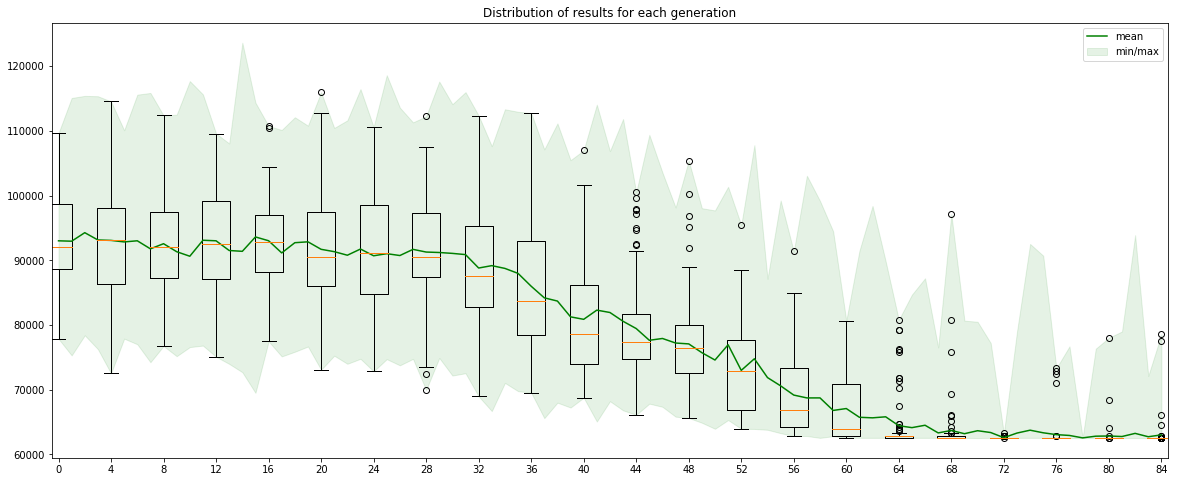

In [56]:
plot_evolution(scores_1, 20)

In [57]:
print_vehicles(aco)

Selected vehicles: 
[5, 21, 22, 26, 32]
Capacity of Selected vehicles: 
[ 100  300  300  300 1000]
Best solution: 
[[  0  19  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   9  58  55  13  76  91   7  15  10   1  39 100  94  53  81  95  54
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  26  62   2  66  77  93  11  90  92  65  30  

## Find ACO solution for problem 2

In [58]:
problem = VehicleRoutingProblem(problem=2)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, True)

solutions_2, scores_2 = aco.run()

Iteration 0 - best score: 116716 / all iterations best score 116716
Iteration 1 - best score: 114624 / all iterations best score 114624
Iteration 2 - best score: 114112 / all iterations best score 114112
Iteration 3 - best score: 114996 / all iterations best score 114112
Iteration 4 - best score: 113240 / all iterations best score 113240
Iteration 5 - best score: 114872 / all iterations best score 113240
Iteration 6 - best score: 113908 / all iterations best score 113240
Iteration 7 - best score: 117846 / all iterations best score 113240
Iteration 8 - best score: 116920 / all iterations best score 113240
Iteration 9 - best score: 114156 / all iterations best score 113240
Iteration 10 - best score: 111052 / all iterations best score 111052
Iteration 11 - best score: 112872 / all iterations best score 111052
Iteration 12 - best score: 114068 / all iterations best score 111052
Iteration 13 - best score: 112920 / all iterations best score 111052
Iteration 14 - best score: 114192 / all iter

In [59]:
print('Best score for problem 2: ', scores_2[-1,0])

Best score for problem 2:  92512


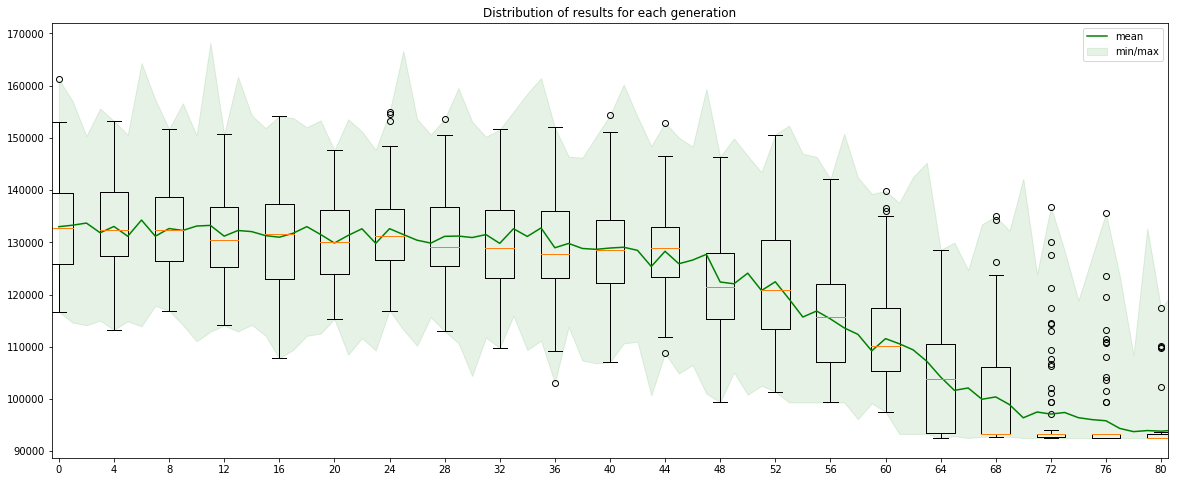

In [60]:
plot_evolution(scores_2, 20)

In [61]:
print_vehicles(aco)

Selected vehicles: 
[9, 13, 21, 22, 23, 24, 25, 26]
Capacity of Selected vehicles: 
[100 100 300 300 300 300 300 300]
Best solution: 
[[  0  46   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  53  58  79   5  33  84   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  64  36  75  16 100  56  9

In [6]:
problem = VehicleRoutingProblem(problem=3)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, True)

solutions_3, scores_3 = aco.run()

Iteration 0 - best score: 62165 / all iterations best score 62165
Iteration 1 - best score: 64268 / all iterations best score 62165
Iteration 2 - best score: 63738 / all iterations best score 62165
Iteration 3 - best score: 64733 / all iterations best score 62165
Iteration 4 - best score: 64882 / all iterations best score 62165
Iteration 5 - best score: 56776 / all iterations best score 56776
Iteration 6 - best score: 57924 / all iterations best score 56776
Iteration 7 - best score: 56040 / all iterations best score 56040
Iteration 8 - best score: 55800 / all iterations best score 55800
Iteration 9 - best score: 65331 / all iterations best score 55800
Iteration 10 - best score: 58164 / all iterations best score 55800
Iteration 11 - best score: 59769 / all iterations best score 55800
Iteration 12 - best score: 55308 / all iterations best score 55308
Iteration 13 - best score: 51180 / all iterations best score 51180
Iteration 14 - best score: 54970 / all iterations best score 51180
Itera

In [9]:
print_vehicles(aco)

Selected vehicles: 
[31, 32]
Capacity of Selected vehicles: 
[1000 1000]
Best solution: 
[[  0  58   9  55  13  76  91   7  15  10   1  39 100  94  53  81  95  54
   31  62   2  36  64  27  26  67  41  28  22  86   8  61  89  84  72  97
   42  50  49  88  60  47  57  70  82  32  56  78  69  46  17  98  66  74
   16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  19  38  87  37  25  14  20  52  80  34  90  92  65  30  11  93  77
    5  51  99  75  33  85  68  12  73  96  71  18   6   3  59   4  29  44
   48  79  45  21  83  16  63  23  24  35  40  43   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]]


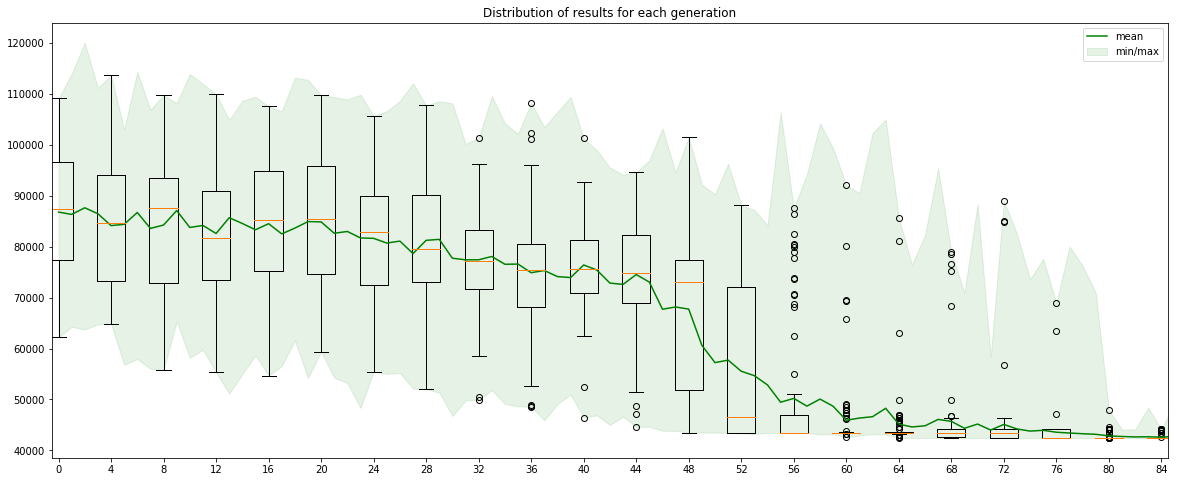

In [13]:
plot_evolution(scores_3, 20)

In [11]:
problem = VehicleRoutingProblem(problem=4)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, True)

solutions_4, scores_4 = aco.run()

Iteration 0 - best score: 89604 / all iterations best score 89604
Iteration 1 - best score: 85274 / all iterations best score 85274
Iteration 2 - best score: 79192 / all iterations best score 79192
Iteration 3 - best score: 70776 / all iterations best score 70776
Iteration 4 - best score: 76554 / all iterations best score 70776
Iteration 5 - best score: 88642 / all iterations best score 70776
Iteration 6 - best score: 89800 / all iterations best score 70776
Iteration 7 - best score: 87208 / all iterations best score 70776
Iteration 8 - best score: 70420 / all iterations best score 70420
Iteration 9 - best score: 76588 / all iterations best score 70420
Iteration 10 - best score: 67830 / all iterations best score 67830
Iteration 11 - best score: 73520 / all iterations best score 67830
Iteration 12 - best score: 88944 / all iterations best score 67830
Iteration 13 - best score: 86990 / all iterations best score 67830
Iteration 14 - best score: 80144 / all iterations best score 67830
Itera

In [12]:
print_vehicles(aco)

Selected vehicles: 
[31, 32]
Capacity of Selected vehicles: 
[1000 1000]
Best solution: 
[[  0  13  57  44  53  21  82  88  62   2  77  15  97  60  23  51  35  32
   47  38  30  42  43   9  39  52  92  50  83  98   3   4  86  34  11  61
   90  79  24  10  72   5  33  84  46  74   1   7  67  26  87  49  66  58
   37   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  40  19  28  17  27  18  12  45  55  94  99  14  81  80   8  76  89
   59  48  22  78  31  29  37  71  69   6  75  36  64  56 100  16  91  65
   41  85  96  54  95  73  20  63  70  25  68  93   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]]


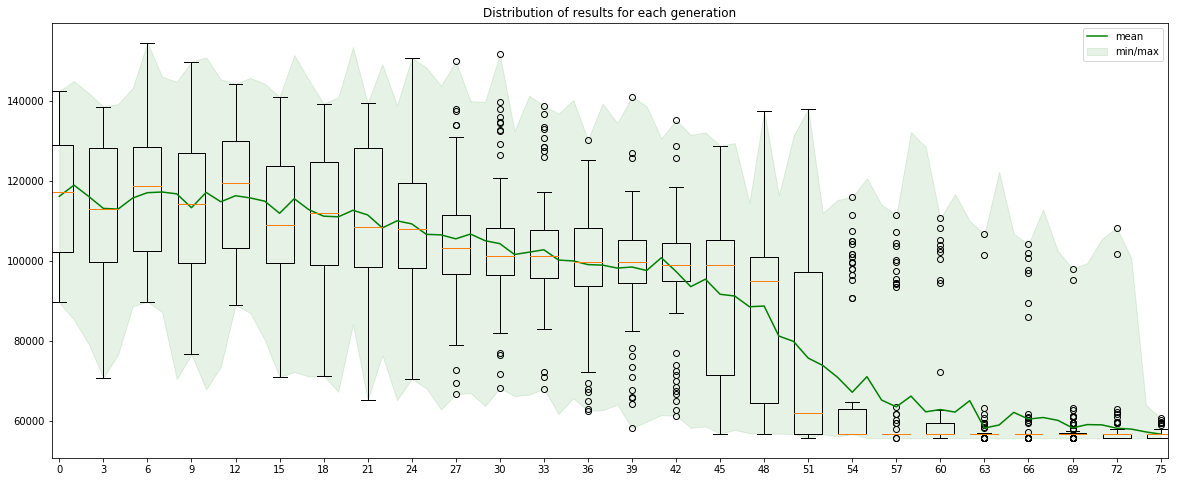

In [14]:
plot_evolution(scores_4, 20)